![Logo  deteccao de doencas do algodao](https://github.com/RianGBispo/PrevisaodeDoencasnoAlgodao/blob/main/CottonDiseasePrediction.png?raw=true)

# Detecção de Doenças em Algodão

Bem-vindo ao meu projeto de detecção de doenças em plantações de algodão! Neste notebook, exploraremos uma abordagem baseada em visão computacional e aprendizado de máquina para identificar e classificar se a imagem pertence ou não à classe doente.

### Objetivo do Projeto

O principal objetivo deste projeto é desenvolver um sistema de detecção simples e preciso que possa ajudar agricultores a identificar rapidamente problemas de saúde em suas plantações de algodão. A detecção precoce de doenças é crucial para a implementação de medidas preventivas e o controle efetivo, contribuindo para uma produção saudável e sustentável.

### Metodologia

Utilizaremos técnicas avançadas de processamento de imagens e machine learning, mais especificamente CNN, para treinar um modelo capaz de reconhecer padrões associados a diferentes doenças em folhas de algodão. Este projeto se concentrará em técnicas de classificação para implementação e avaliação do modelo.

### Conjunto de Dados

Para alcançar nossos objetivos, utilizaremos um conjunto de dados abrangente, contendo imagens rotuladas de folhas de algodão saudáveis e afetadas por diversas doenças.

### Estrutura do Notebook

1. Configurando o Ambiente
2. Bibliotecas
3. Carregando Dados
4. Treinamento e DataLoader
5. Construindo a CNN
6. Resumo
7. Treinamento da CNN
8. Teste

Vamos começar!



## Configurando o Ambiente

In [1]:
!nvidia-smi

Wed Dec 13 01:22:11 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import torch

if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f"GPU: {torch.cuda.get_device_name(0)}")
else:
    device = torch.device("cpu")
    print("GPU não disponível. Usando CPU.")

GPU: Tesla T4


### 1. Bibliotecas

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D
import numpy as np
from tensorflow.keras.preprocessing import image

print(tf.__version__)

2.14.0


##Carregando Dados

In [4]:
!git clone https://github.com/RianGBispo/PrevisaodeDoencasnoAlgodao
HOME = "/content/PrevisaodeDoencasnoAlgodao"

print(HOME)
%cd {HOME}

Cloning into 'PrevisaodeDoencasnoAlgodao'...
remote: Enumerating objects: 2302, done.
remote: Total 2302 (delta 0), reused 0 (delta 0), pack-reused 2302
Receiving objects: 100% (2302/2302), 146.15 MiB | 15.36 MiB/s, done.
Updating files: 100% (2316/2316), done.
/content/PrevisaodeDoencasnoAlgodao
/content/PrevisaodeDoencasnoAlgodao


### 2. Treinamento e DataLoader

In [5]:
# Configurando gerador de imagens para aumentação de dados.
train_datagen = ImageDataGenerator(rescale = 1./255,           # Normalização dos valores dos pixels para intervalo entre 0 e 1.
                                   shear_range = 0.2,        # Cisalhamento aleatório para criar uma distorção semelhante a uma tesoura.
                                   zoom_range = 0.2,          # Zoom aleatório para adicionar variação à escala.
                                   horizontal_flip = True)   # Inversão horizontal aleatória para adicionar variação refletindo a imagem.

In [6]:
# Configurando o conjunto de treinamento usando o gerador de imagens para aumentação de dados.
training_set = train_datagen.flow_from_directory('Cotton Disease/train',
                                                 target_size=(64, 64),   # Tamanho desejado para as imagens (64x64 pixels).
                                                 batch_size=32,          # Tamanho do lote de imagens utilizado durante o treinamento.
                                                 class_mode='categorical')  # Modo de classificação categórica para problemas de classificação multiclasse.

# Configurando o conjunto de teste usando um gerador de imagens sem aumentação de dados.
test_datagen = ImageDataGenerator(rescale=1./255)  # Apenas normalização para o conjunto de teste.
test_set = test_datagen.flow_from_directory('Cotton Disease/test',
                                            target_size=(64, 64),   # Tamanho desejado para as imagens (64x64 pixels).
                                            batch_size=32,          # Tamanho do lote de imagens utilizado durante a avaliação.
                                            class_mode='categorical')  # Modo de classificação categórica para problemas de classificação multiclasse.


Found 1951 images belonging to 4 classes.
Found 106 images belonging to 4 classes.


### Construindo a Convolutional Neural Network (CNN)

Imagine que estamos treinando um "cérebro artificial", ou rede neural, para reconhecer diferentes tipos de imagens, como gatos, cachorros, carros, ou doenças no algodão, como é o nosso caso.

#### Primeira Etapa - Reconhecimento de Formas:

No início, o cérebro aprende a reconhecer formas básicas nas imagens, como bordas, curvas, ou padrões simples. Isso é feito através de uma fase chamada "convolução", onde o cérebro olha para pequenas partes da imagem de cada vez.

Em seguida, ele dá uma olhada mais ampla para entender as características mais importantes, como a forma geral, usando uma fase chamada "agrupamento".

In [7]:
# Iniciando a CNN
cnn = tf.keras.models.Sequential()

# Passo 1 - Convolução
cnn.add(tf.keras.layers.Conv2D(filters=32,
                               padding="same",
                               kernel_size=3,
                               activation='relu',
                               input_shape=[64, 64, 3]))

#### Segunda Etapa - Compreensão Avançada:

Depois de aprender essas características básicas, o cérebro aprimora sua compreensão, olhando para partes maiores e mais complexas das imagens. Isso é feito adicionando outra camada de "convolução" e "agrupamento".

In [8]:
# Paso 2 - Agrupamento
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adicionando uma seguinda camada convolucvional
cnn.add(tf.keras.layers.Conv2D(filters=32, padding='same', kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))

#### Próximo Passo - Pensamento Abstrato:

Agora, o cérebro precisa pensar de maneira mais abstrata. Ele "esmaga" as informações aprendidas até agora para torná-las mais fáceis de entender, e isso é chamado de "achatamento".

Em seguida, ele conecta todas essas informações da maneira que o cérebro humano faz, para entender padrões mais complexos.

In [9]:
# Passo 3 - Achatamento
cnn.add(tf.keras.layers.Flatten())

# Passo 4 - Conexão completa
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

#### Decisões Finais - Qual é a Imagem?:

Finalmente, o cérebro faz as decisões finais. Com base em tudo o que aprendeu, decide se a imagem é de uma planta doente ou não.

Ele atribui probabilidades a cada opção, o que significa que ele pode não ter certeza absoluta, mas faz a melhor suposição possível.

Em resumo, a Convolutional Neural Network (CNN) é como um cérebro artificial que aprende a reconhecer diferentes coisas em imagens, passo a passo, desde formas simples até padrões mais complexos, para tomar decisões sobre o que está vendo.

In [10]:
# Passo 5 - Camada de saída
cnn.add(tf.keras.layers.Dense(units=4, activation='softmax'))

## Resumo

In [11]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 128)               1

## Treinando a CNN

In [12]:
# Compilando a CNN
cnn.compile(optimizer = 'adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])
# Treinando a CNN no conjunto de treinamento e avaliando-a no conjunto de testes
cnn.fit(x = training_set, validation_data = test_set, epochs = 30)

Epoch 1/30
61/61 [==============================] - 21s 176ms/step - loss: 1.3167 - accuracy: 0.4357 - val_loss: 1.2523 - val_accuracy: 0.3868
Epoch 2/30
61/61 [==============================] - 10s 164ms/step - loss: 1.0221 - accuracy: 0.5935 - val_loss: 0.9953 - val_accuracy: 0.5472
Epoch 3/30
61/61 [==============================] - 9s 142ms/step - loss: 0.8251 - accuracy: 0.6955 - val_loss: 0.7281 - val_accuracy: 0.7170
Epoch 4/30
61/61 [==============================] - 10s 156ms/step - loss: 0.6777 - accuracy: 0.7386 - val_loss: 0.6018 - val_accuracy: 0.7642
Epoch 5/30
61/61 [==============================] - 11s 182ms/step - loss: 0.5921 - accuracy: 0.7693 - val_loss: 0.7339 - val_accuracy: 0.6698
Epoch 6/30
61/61 [==============================] - 10s 164ms/step - loss: 0.5451 - accuracy: 0.7842 - val_loss: 0.7679 - val_accuracy: 0.7075
Epoch 7/30
61/61 [==============================] - 9s 141ms/step - loss: 0.4970 - accuracy: 0.8093 - val_loss: 0.6880 - val_accuracy: 0.7358
E

In [13]:
# Salvando o modelo treinado
cnn.save('modelo_cnn.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


##Teste

1/1 [==============================] - 0s 163ms/step


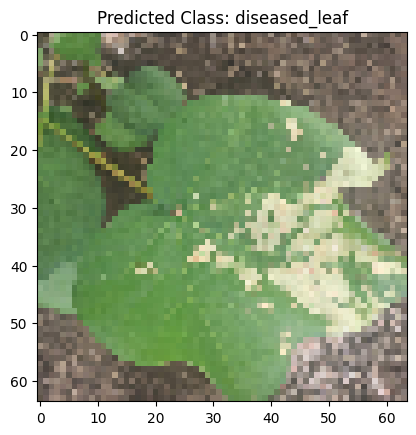

Array de Saída: [[9.9998522e-01 4.0465343e-06 3.9763099e-06 6.7020515e-06]]


In [14]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_image_and_prediction(model, image_path, class_names):
    # Carregando a imagem
    test_image = image.load_img(image_path, target_size=(64, 64))
    test_image_array = image.img_to_array(test_image)
    test_image_array = test_image_array / 255.0  # Normalizando os valores dos pixels para o intervalo [0, 1]

    # Expandindo as dimensões para a previsão
    test_image_array = np.expand_dims(test_image_array, axis=0)

    # Realizando a previsão
    result = model.predict(test_image_array)

    # Mapeando os resultados para as classes
    predicted_class = class_names[np.argmax(result)]

    # Exibindo a imagem
    plt.imshow(test_image)
    plt.title(f'Predicted Class: {predicted_class}')
    plt.show()

    # Exibindo o array de saída
    print("Array de Saída:", result)

# Exemplo de uso
image_path = 'Cotton Disease/test/diseased cotton leaf/dis_leaf (124).jpg'
class_names = ["diseased_leaf", "diseased_plant", "fresh_leaf", "fresh_plant"]

visualize_image_and_prediction(cnn, image_path, class_names)

###Predição em Português

1/1 [==============================] - 0s 17ms/step


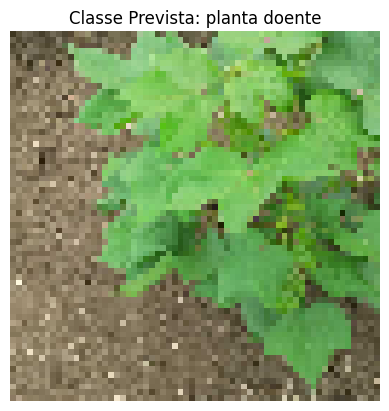

Array de Saída: [[2.3286873e-06 9.9189758e-01 2.3360742e-06 8.0976626e-03]]


In [15]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_image_and_prediction(model, image_path, class_names):
    # Dicionário de tradução
    translation_dict = {
        'diseased_leaf': 'folha doente',
        'diseased_plant': 'planta doente',
        'fresh_leaf': 'folha saudável',
        'fresh_plant': 'planta saudável'
    }

    # Carregando a imagem
    test_image = image.load_img(image_path, target_size=(64, 64))
    test_image_array = image.img_to_array(test_image)
    test_image_array = test_image_array / 255.0  # Normalizando os valores dos pixels para o intervalo [0, 1]

    # Expandindo as dimensões para a previsão
    test_image_array = np.expand_dims(test_image_array, axis=0)

    # Realizando a previsão
    result = model.predict(test_image_array)

    # Mapeando os resultados para as classes
    predicted_class_index = np.argmax(result)
    predicted_class_english = class_names[predicted_class_index]
    predicted_class_portuguese = translation_dict.get(predicted_class_english, predicted_class_english)

    # Exibindo a imagem
    plt.imshow(test_image)
    plt.title(f'Classe Prevista: {predicted_class_portuguese}')
    plt.axis('off')
    plt.show()

    # Exibindo o array de saída
    print("Array de Saída:", result)

# Exemplo de uso
image_path = 'Cotton Disease/test/diseased cotton plant/dd (176)_iaip.jpg'
class_names = ["diseased_leaf", "diseased_plant", "fresh_leaf", "fresh_plant"]

visualize_image_and_prediction(cnn, image_path, class_names)


###Visualizando a imagem de Entrada

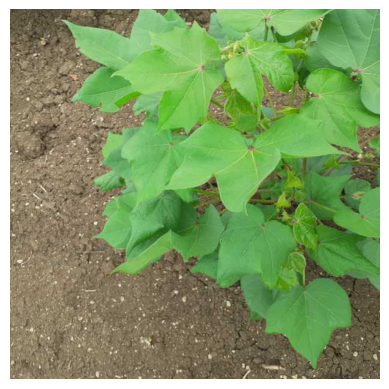

In [16]:
import matplotlib.image as mpimg

# Carregar a imagem usando a função imread do matplotlib.image
imagem = mpimg.imread('Cotton Disease/test/diseased cotton plant/dd (176)_iaip.jpg')

# Exibir a imagem usando a função imshow do matplotlib.pyplot
plt.imshow(imagem)
plt.axis('off')  # Desligar os eixos para uma exibição mais limpa (opcional)
plt.show()

###visualizando O resultado para toda as imagens de test

Categoria: diseased cotton leaf
1/1 [==============================] - 0s 26ms/step


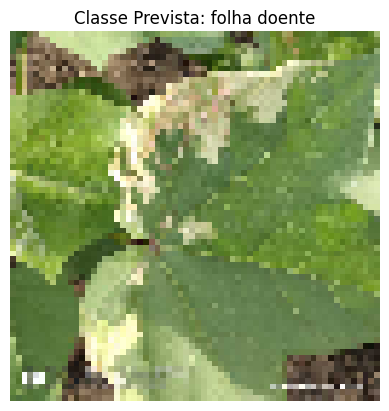

Array de Saída: [[9.9813843e-01 1.7423536e-06 1.8594350e-03 3.5255482e-07]]
Categoria: diseased cotton leaf
1/1 [==============================] - 0s 30ms/step


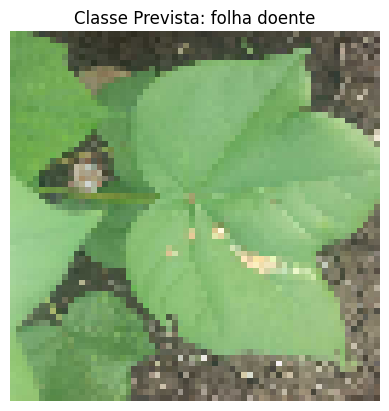

Array de Saída: [[9.7303957e-01 9.1308018e-04 2.2663947e-02 3.3834234e-03]]
Categoria: diseased cotton leaf
1/1 [==============================] - 0s 26ms/step


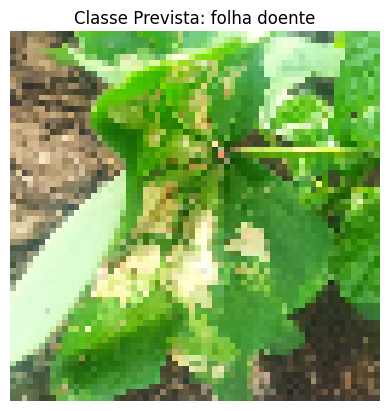

Array de Saída: [[9.999999e-01 6.022758e-08 7.904456e-11 4.973279e-09]]
Categoria: diseased cotton leaf
1/1 [==============================] - 0s 27ms/step


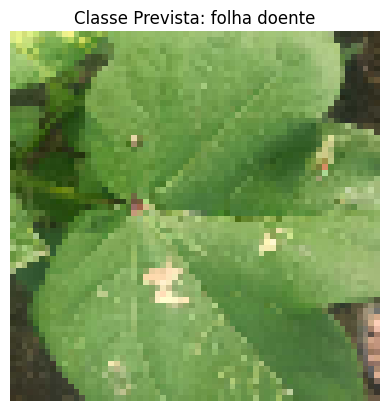

Array de Saída: [[9.9354100e-01 4.1635317e-04 6.9684014e-05 5.9729773e-03]]
Categoria: diseased cotton leaf
1/1 [==============================] - 0s 26ms/step


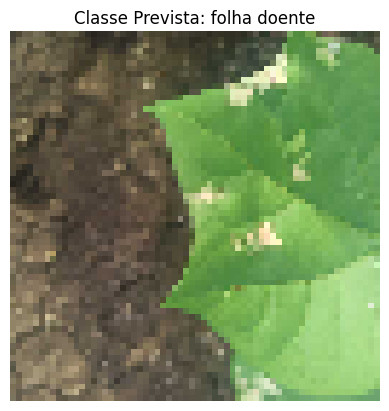

Array de Saída: [[9.9432963e-01 5.3715617e-03 2.7560114e-04 2.3233379e-05]]
Categoria: diseased cotton leaf
1/1 [==============================] - 0s 31ms/step


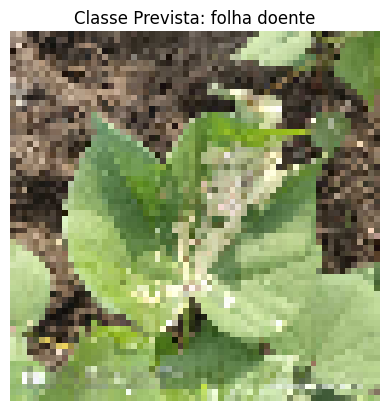

Array de Saída: [[9.9885345e-01 2.8889208e-05 1.1175788e-03 8.5466922e-09]]
Categoria: diseased cotton leaf
1/1 [==============================] - 0s 28ms/step


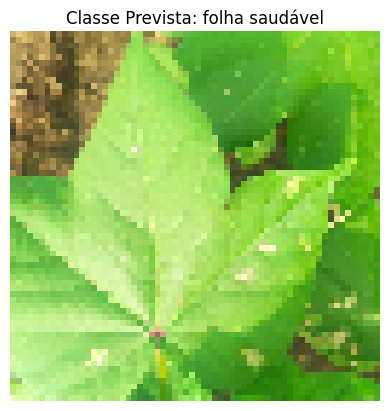

Array de Saída: [[0.27572536 0.0021866  0.6310581  0.09102989]]
Categoria: diseased cotton leaf
1/1 [==============================] - 0s 31ms/step


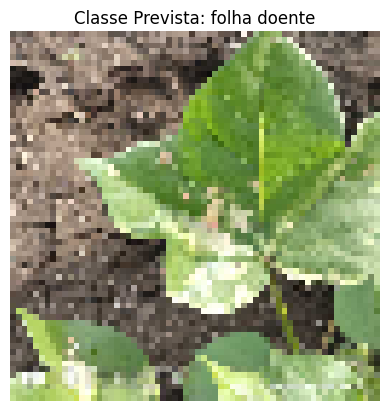

Array de Saída: [[9.9995792e-01 4.0770035e-05 1.3452835e-06 2.0544819e-08]]
Categoria: diseased cotton leaf
1/1 [==============================] - 0s 21ms/step


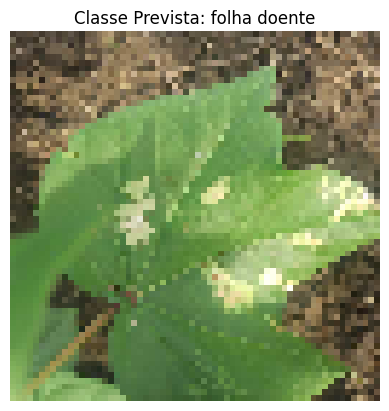

Array de Saída: [[9.9993885e-01 5.1775613e-05 9.0877202e-06 2.8857036e-07]]
Categoria: diseased cotton leaf
1/1 [==============================] - 0s 20ms/step


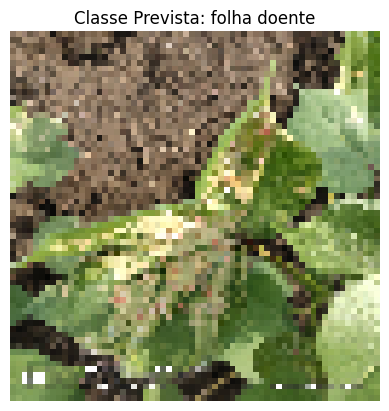

Array de Saída: [[9.9580860e-01 4.1902680e-03 1.1803962e-06 5.5184309e-11]]
Categoria: diseased cotton leaf
1/1 [==============================] - 0s 20ms/step


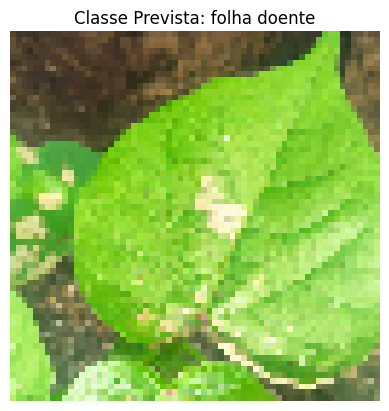

Array de Saída: [[9.3634510e-01 3.5723094e-02 5.0977331e-05 2.7880844e-02]]
Categoria: diseased cotton leaf
1/1 [==============================] - 0s 22ms/step


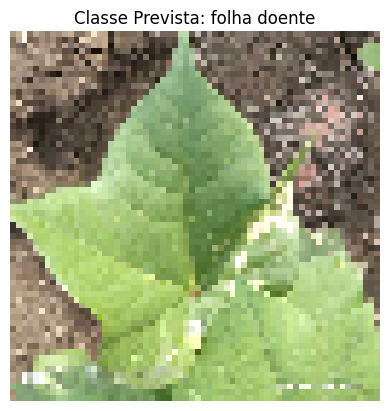

Array de Saída: [[9.6239805e-01 5.7931549e-05 3.7540309e-02 3.6368938e-06]]
Categoria: diseased cotton leaf
1/1 [==============================] - 0s 20ms/step


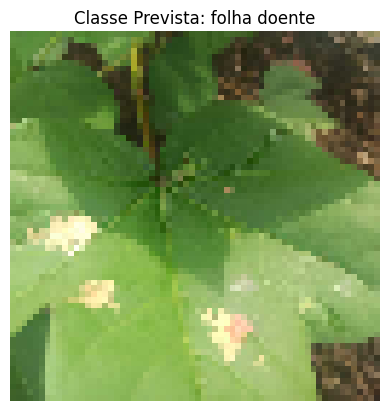

Array de Saída: [[0.7978179  0.09172617 0.10323794 0.00721811]]
Categoria: diseased cotton leaf
1/1 [==============================] - 0s 17ms/step


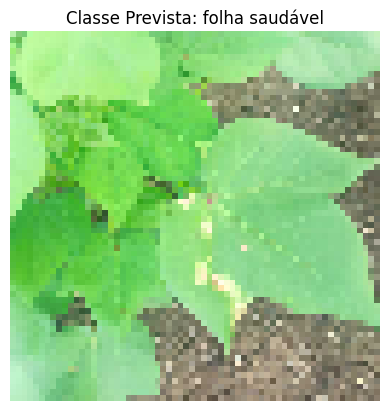

Array de Saída: [[0.09404226 0.22480305 0.525095   0.15605967]]
Categoria: diseased cotton leaf
1/1 [==============================] - 0s 17ms/step


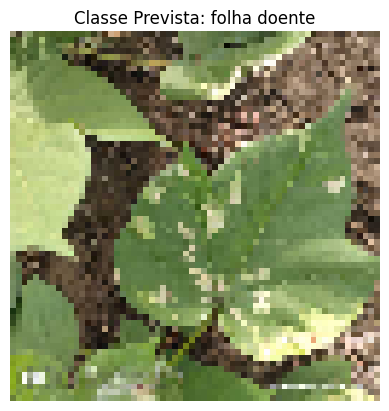

Array de Saída: [[9.9015838e-01 3.9474087e-04 9.4468463e-03 3.5857919e-10]]
Categoria: diseased cotton leaf
1/1 [==============================] - 0s 17ms/step


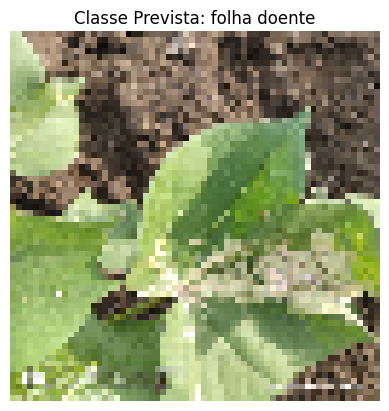

Array de Saída: [[9.9999964e-01 2.3037863e-08 3.2326233e-07 1.3516082e-09]]
Categoria: diseased cotton leaf
1/1 [==============================] - 0s 17ms/step


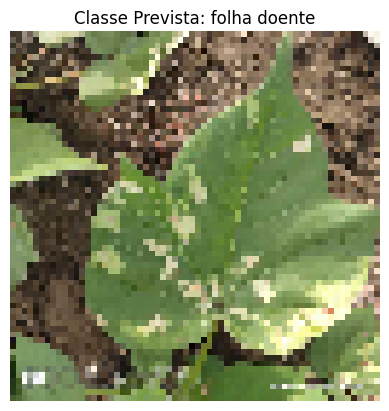

Array de Saída: [[9.9995995e-01 4.7094979e-08 4.0026611e-05 1.7597946e-11]]
Categoria: diseased cotton leaf
1/1 [==============================] - 0s 18ms/step


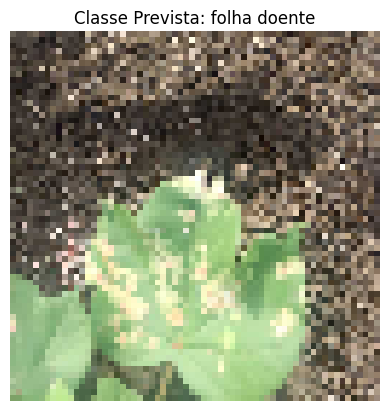

Array de Saída: [[9.9999952e-01 2.4876952e-09 4.1700886e-07 5.2431554e-10]]
Categoria: diseased cotton leaf
1/1 [==============================] - 0s 17ms/step


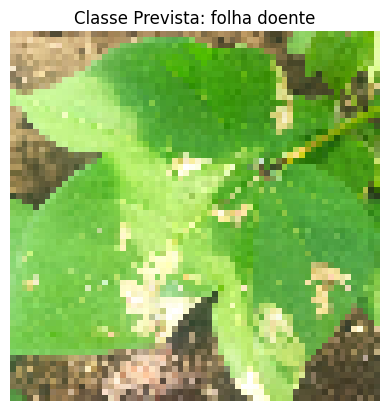

Array de Saída: [[9.99850392e-01 1.15047165e-04 3.05416553e-10 3.45643166e-05]]
Categoria: diseased cotton leaf
1/1 [==============================] - 0s 18ms/step


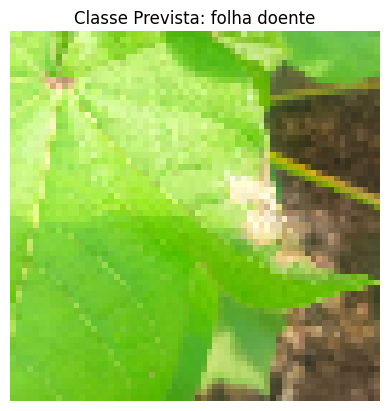

Array de Saída: [[9.7105545e-01 2.8833499e-02 6.5281165e-05 4.5824148e-05]]
Categoria: diseased cotton leaf
1/1 [==============================] - 0s 17ms/step


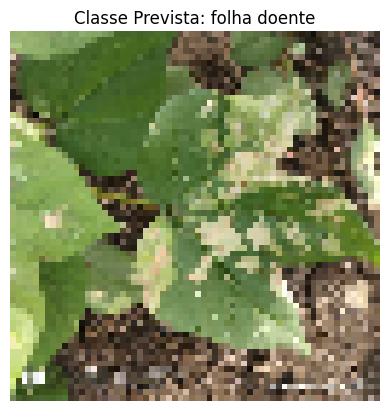

Array de Saída: [[9.9999762e-01 2.4215858e-06 4.6478771e-08 2.5935283e-12]]
Categoria: diseased cotton leaf
1/1 [==============================] - 0s 19ms/step


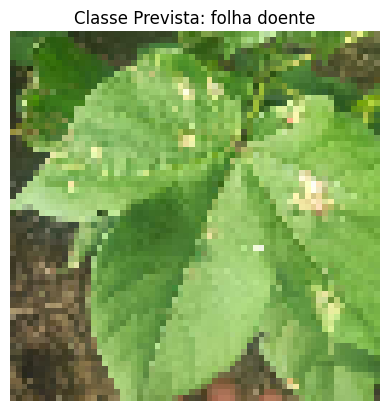

Array de Saída: [[9.5169401e-01 4.9885269e-04 3.1617407e-02 1.6189784e-02]]
Categoria: diseased cotton leaf
1/1 [==============================] - 0s 20ms/step


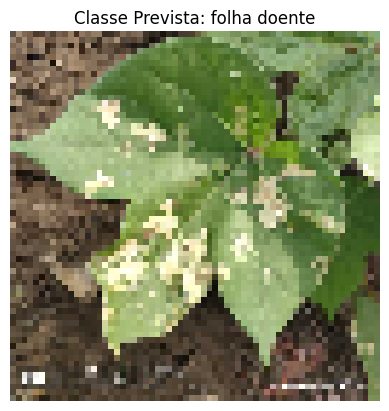

Array de Saída: [[9.9999988e-01 7.7622495e-08 2.7703020e-09 8.7977883e-13]]
Categoria: diseased cotton leaf
1/1 [==============================] - 0s 20ms/step


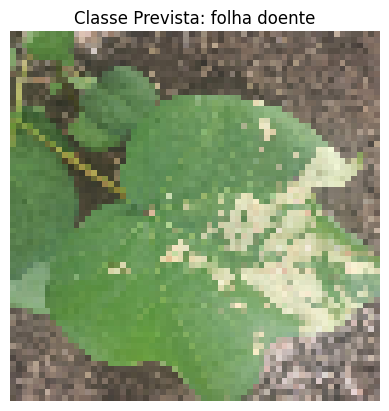

Array de Saída: [[9.9998522e-01 4.0465343e-06 3.9763099e-06 6.7020515e-06]]
Categoria: diseased cotton leaf
1/1 [==============================] - 0s 17ms/step


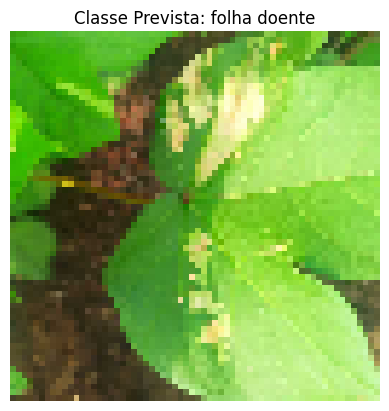

Array de Saída: [[5.3316981e-01 4.6400267e-01 9.8591270e-05 2.7288736e-03]]
Categoria: fresh cotton leaf
1/1 [==============================] - 0s 21ms/step


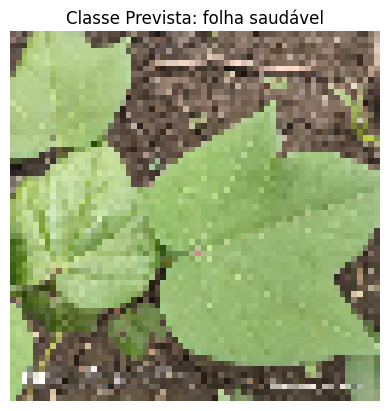

Array de Saída: [[3.2481344e-06 1.2955728e-07 9.9999666e-01 9.0061625e-11]]
Categoria: fresh cotton leaf
1/1 [==============================] - 0s 24ms/step


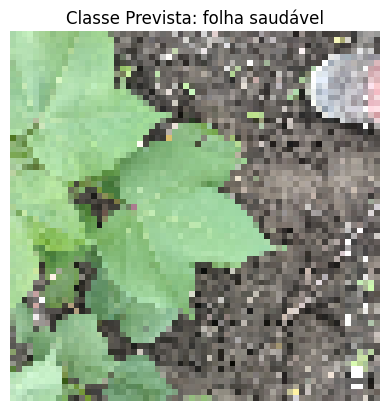

Array de Saída: [[1.7013911e-06 3.2155640e-06 9.9999511e-01 3.5808084e-10]]
Categoria: fresh cotton leaf
1/1 [==============================] - 0s 23ms/step


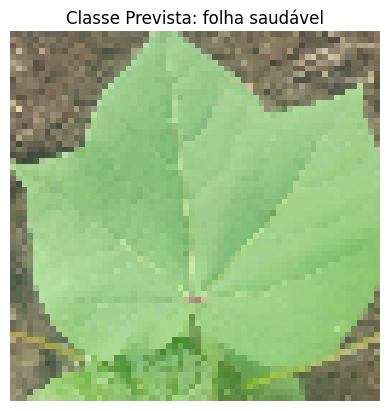

Array de Saída: [[2.3299461e-05 7.5683660e-05 9.9989653e-01 4.5130473e-06]]
Categoria: fresh cotton leaf
1/1 [==============================] - 0s 20ms/step


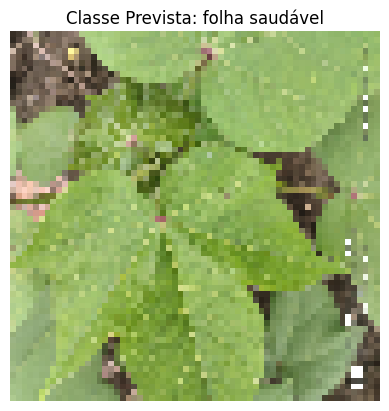

Array de Saída: [[3.2913671e-03 3.3714415e-03 9.9332786e-01 9.2991440e-06]]
Categoria: fresh cotton leaf
1/1 [==============================] - 0s 17ms/step


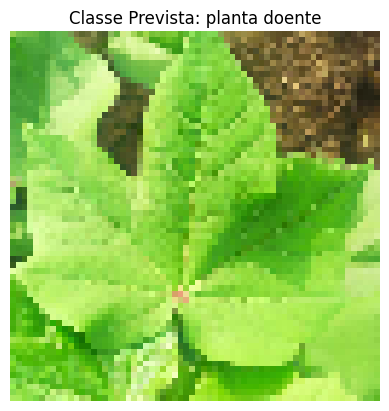

Array de Saída: [[6.1621569e-05 5.4109049e-01 4.4154537e-01 1.7302593e-02]]
Categoria: fresh cotton leaf
1/1 [==============================] - 0s 20ms/step


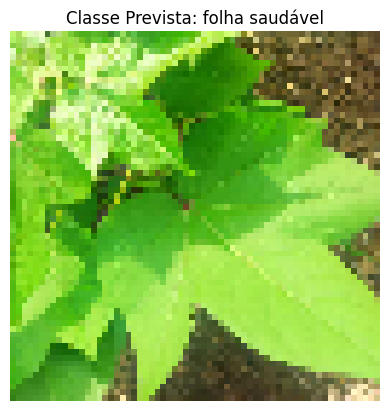

Array de Saída: [[4.8130873e-06 1.7502846e-04 9.9982005e-01 1.4020694e-07]]
Categoria: fresh cotton leaf
1/1 [==============================] - 0s 20ms/step


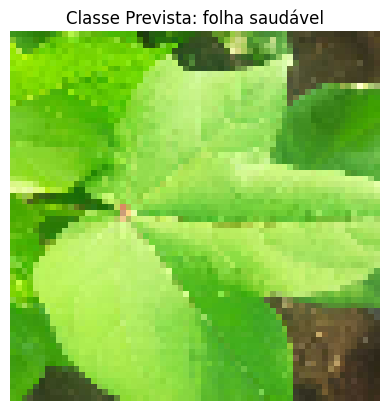

Array de Saída: [[2.4441120e-03 1.6010414e-04 9.9555725e-01 1.8386351e-03]]
Categoria: fresh cotton leaf
1/1 [==============================] - 0s 20ms/step


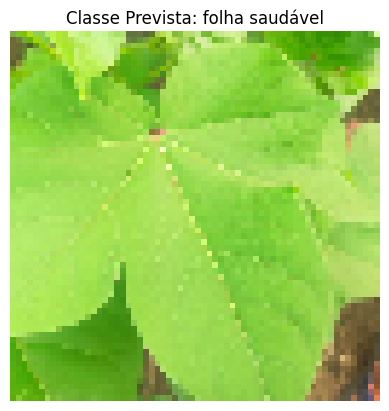

Array de Saída: [[0.00197714 0.02349021 0.9710708  0.00346181]]
Categoria: fresh cotton leaf
1/1 [==============================] - 0s 17ms/step


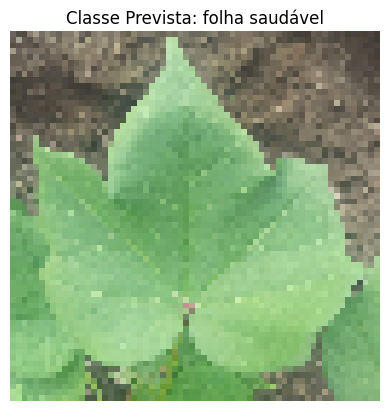

Array de Saída: [[2.3547359e-04 4.4166969e-04 9.9931800e-01 4.8908191e-06]]
Categoria: fresh cotton leaf
1/1 [==============================] - 0s 30ms/step


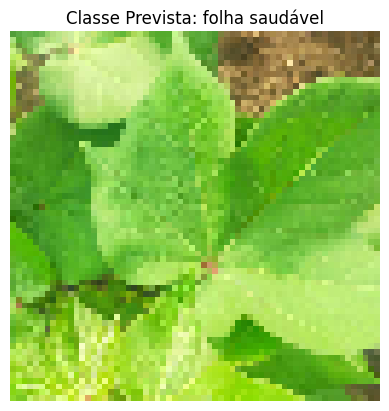

Array de Saída: [[3.3844299e-05 4.1381377e-03 9.7077370e-01 2.5054244e-02]]
Categoria: fresh cotton leaf
1/1 [==============================] - 0s 17ms/step


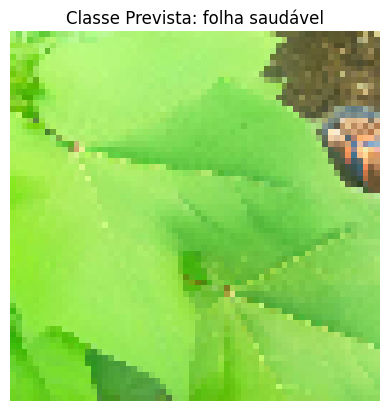

Array de Saída: [[3.4261695e-05 1.6194470e-03 9.9732769e-01 1.0186904e-03]]
Categoria: fresh cotton leaf
1/1 [==============================] - 0s 18ms/step


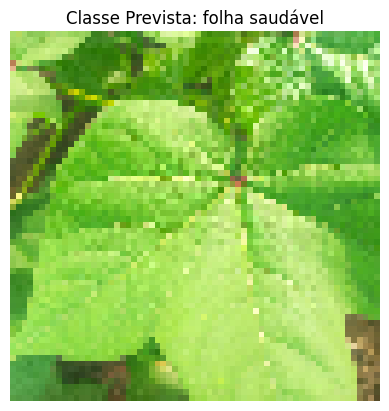

Array de Saída: [[6.6825248e-02 4.7758158e-04 9.0524542e-01 2.7451698e-02]]
Categoria: fresh cotton leaf
1/1 [==============================] - 0s 21ms/step


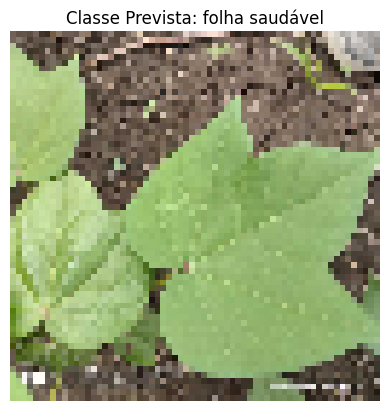

Array de Saída: [[1.4702411e-05 1.1763016e-07 9.9998522e-01 6.5577577e-10]]
Categoria: fresh cotton leaf
1/1 [==============================] - 0s 18ms/step


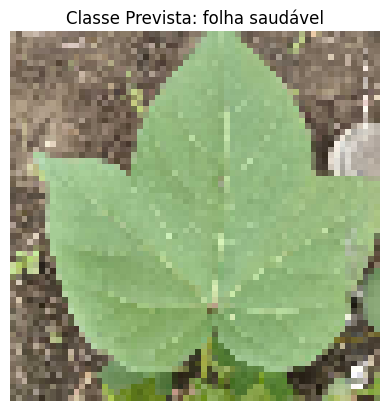

Array de Saída: [[2.0504986e-05 3.0543828e-07 9.9997914e-01 6.8911765e-09]]
Categoria: fresh cotton leaf
1/1 [==============================] - 0s 21ms/step


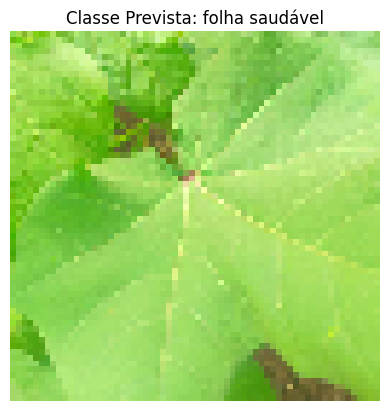

Array de Saída: [[0.01145359 0.00107557 0.9807864  0.00668445]]
Categoria: fresh cotton leaf
1/1 [==============================] - 0s 18ms/step


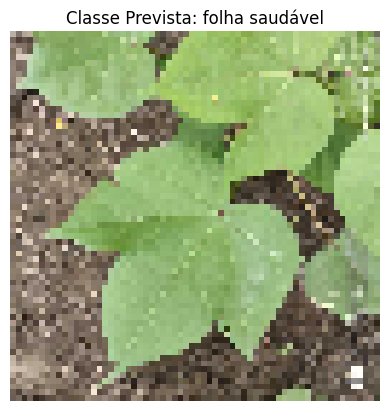

Array de Saída: [[7.3319278e-04 1.7044924e-05 9.9924976e-01 1.3671883e-08]]
Categoria: fresh cotton leaf
1/1 [==============================] - 0s 28ms/step


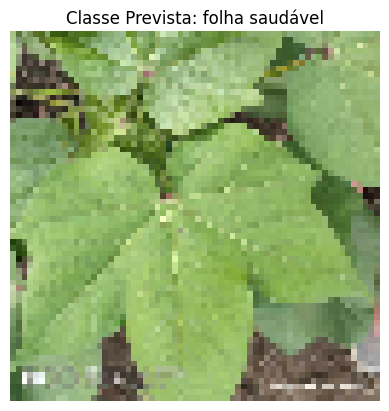

Array de Saída: [[1.5113209e-06 1.1153221e-06 9.9999738e-01 4.8760445e-08]]
Categoria: fresh cotton leaf
1/1 [==============================] - 0s 25ms/step


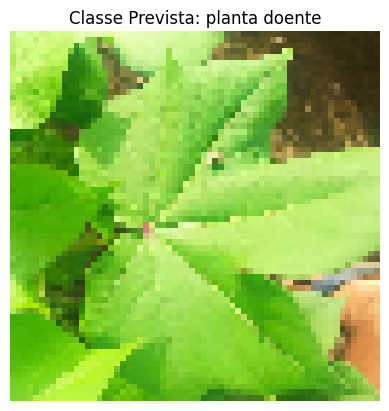

Array de Saída: [[3.9644909e-04 9.1664928e-01 7.7903226e-02 5.0510638e-03]]
Categoria: fresh cotton leaf
1/1 [==============================] - 0s 17ms/step


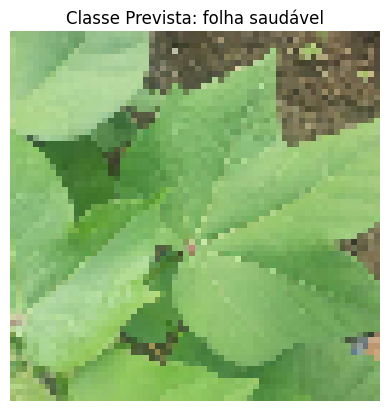

Array de Saída: [[2.0111958e-03 1.0355879e-03 9.9665534e-01 2.9784156e-04]]
Categoria: fresh cotton leaf
1/1 [==============================] - 0s 19ms/step


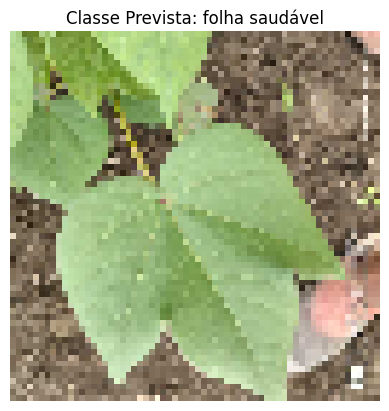

Array de Saída: [[5.8004927e-05 8.0011074e-07 9.9994123e-01 1.8819115e-08]]
Categoria: fresh cotton leaf
1/1 [==============================] - 0s 17ms/step


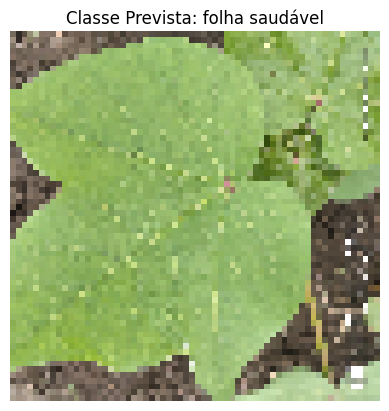

Array de Saída: [[2.4170401e-04 3.1755003e-06 9.9975425e-01 7.9031179e-07]]
Categoria: fresh cotton leaf
1/1 [==============================] - 0s 28ms/step


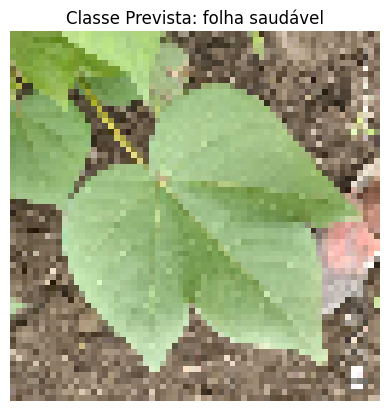

Array de Saída: [[4.9035181e-04 1.4471491e-06 9.9950814e-01 1.8991400e-08]]
Categoria: fresh cotton leaf
1/1 [==============================] - 0s 22ms/step


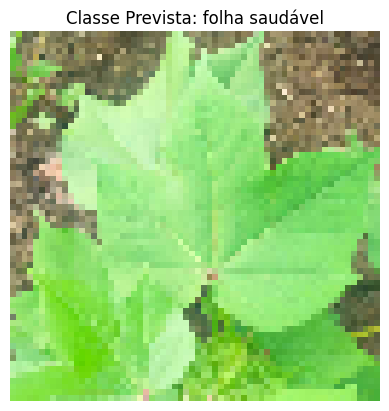

Array de Saída: [[2.8157912e-04 6.8664260e-02 9.1551477e-01 1.5539397e-02]]
Categoria: fresh cotton leaf
1/1 [==============================] - 0s 17ms/step


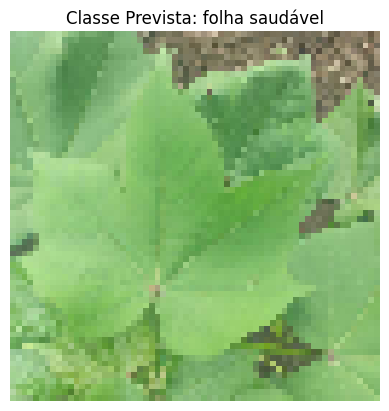

Array de Saída: [[7.1478316e-05 2.9694967e-04 9.9962664e-01 4.9305177e-06]]
Categoria: fresh cotton leaf
1/1 [==============================] - 0s 24ms/step


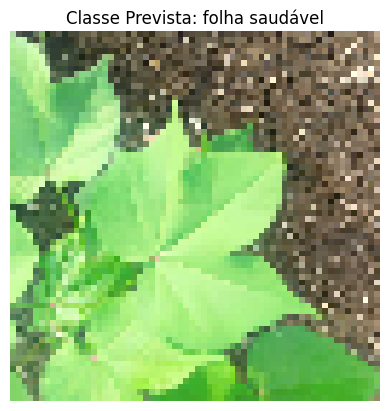

Array de Saída: [[4.3113232e-03 2.9803388e-04 9.9533784e-01 5.2840569e-05]]
Categoria: fresh cotton leaf
1/1 [==============================] - 0s 17ms/step


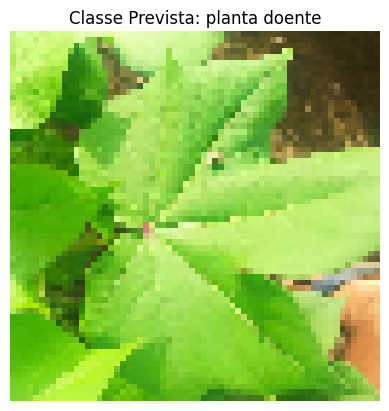

Array de Saída: [[3.9644909e-04 9.1664928e-01 7.7903226e-02 5.0510638e-03]]
Categoria: fresh cotton plant
1/1 [==============================] - 0s 20ms/step


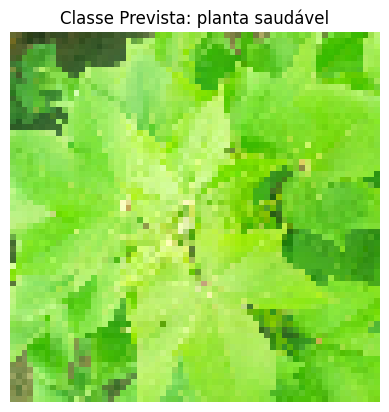

Array de Saída: [[4.7559065e-06 5.1595173e-03 4.3156400e-05 9.9479252e-01]]
Categoria: fresh cotton plant
1/1 [==============================] - 0s 18ms/step


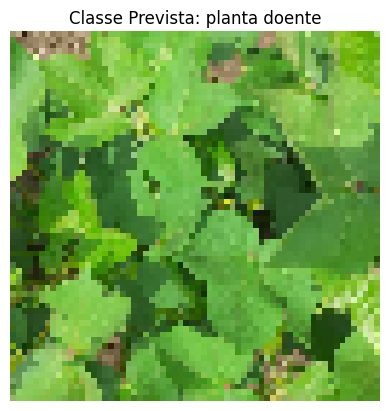

Array de Saída: [[5.7906044e-09 7.8272057e-01 1.1819267e-06 2.1727823e-01]]
Categoria: fresh cotton plant
1/1 [==============================] - 0s 19ms/step


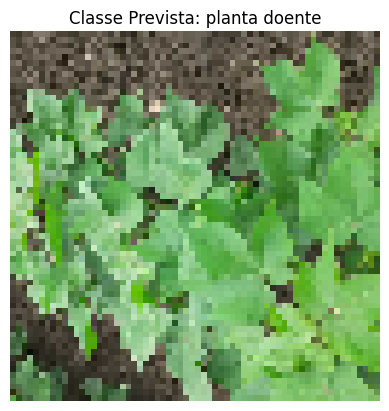

Array de Saída: [[2.7666881e-06 8.8519555e-01 9.0278136e-06 1.1479270e-01]]
Categoria: fresh cotton plant
1/1 [==============================] - 0s 17ms/step


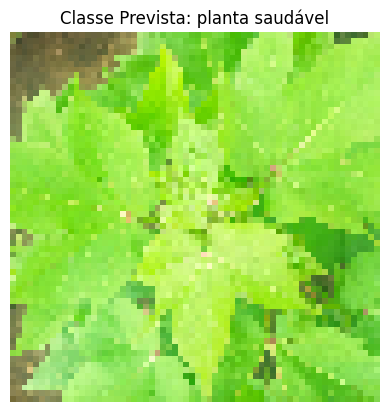

Array de Saída: [[4.9639931e-07 5.7042960e-02 2.3780017e-06 9.4295418e-01]]
Categoria: fresh cotton plant
1/1 [==============================] - 0s 27ms/step


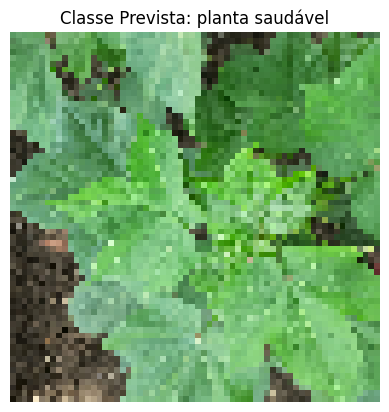

Array de Saída: [[2.0004542e-08 1.0469385e-01 4.1871419e-07 8.9530569e-01]]
Categoria: fresh cotton plant
1/1 [==============================] - 0s 27ms/step


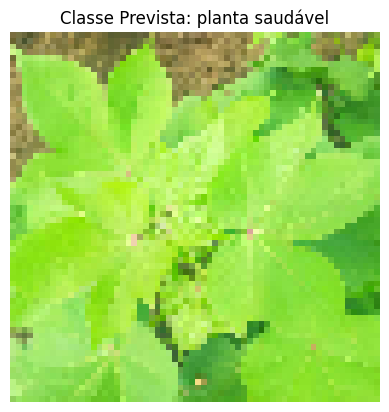

Array de Saída: [[4.5074667e-06 1.3011086e-01 1.6750729e-06 8.6988300e-01]]
Categoria: fresh cotton plant
1/1 [==============================] - 0s 25ms/step


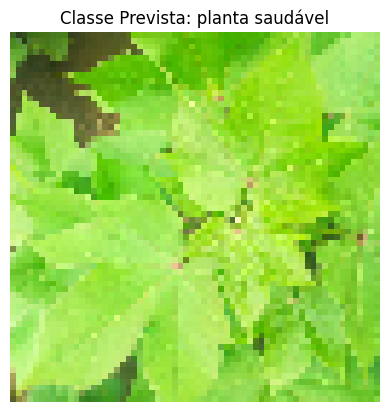

Array de Saída: [[5.6919762e-05 3.5155736e-02 1.3981119e-02 9.5080626e-01]]
Categoria: fresh cotton plant
1/1 [==============================] - 0s 29ms/step


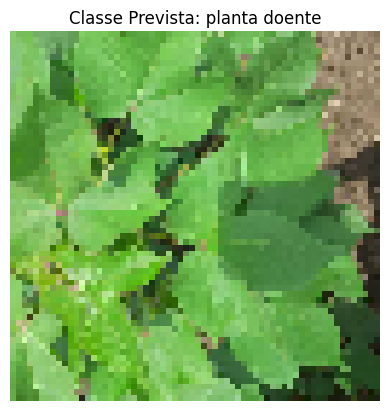

Array de Saída: [[4.9369260e-07 9.3157816e-01 1.6432800e-08 6.8421356e-02]]
Categoria: fresh cotton plant
1/1 [==============================] - 0s 44ms/step


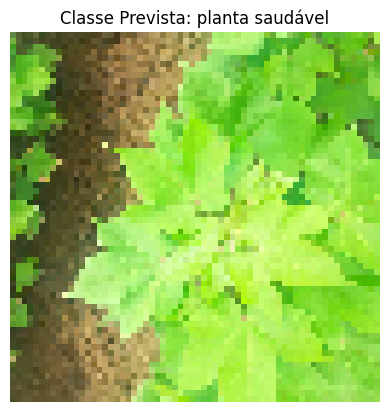

Array de Saída: [[1.5734707e-04 4.1903526e-02 8.2271717e-06 9.5793092e-01]]
Categoria: fresh cotton plant
1/1 [==============================] - 0s 42ms/step


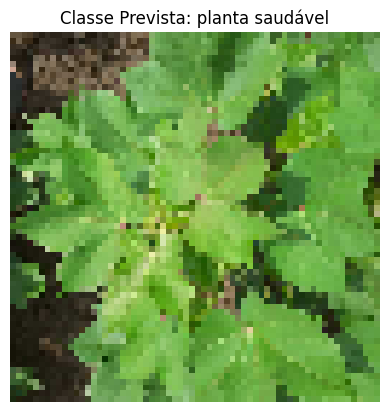

Array de Saída: [[2.0338680e-07 2.6713234e-01 1.7656461e-06 7.3286569e-01]]
Categoria: fresh cotton plant
1/1 [==============================] - 0s 35ms/step


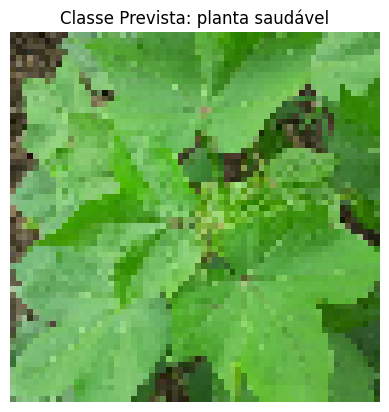

Array de Saída: [[1.3564023e-06 1.1559774e-01 2.0765485e-07 8.8440073e-01]]
Categoria: fresh cotton plant
1/1 [==============================] - 0s 36ms/step


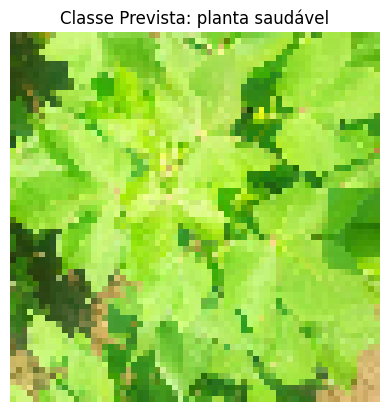

Array de Saída: [[2.7730315e-05 4.8756966e-01 3.9889310e-03 5.0841367e-01]]
Categoria: fresh cotton plant
1/1 [==============================] - 0s 32ms/step


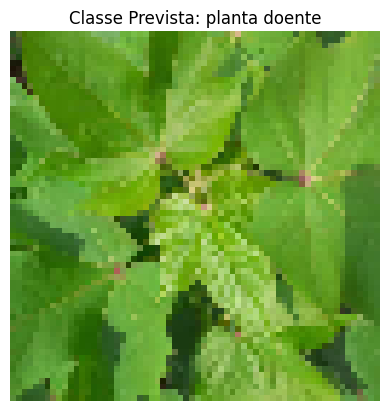

Array de Saída: [[6.3452717e-07 9.9690920e-01 3.8502734e-12 3.0901749e-03]]
Categoria: fresh cotton plant
1/1 [==============================] - 0s 32ms/step


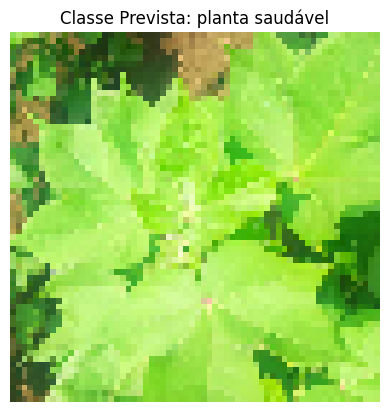

Array de Saída: [[5.4385373e-06 2.8075096e-03 1.3974101e-04 9.9704725e-01]]
Categoria: fresh cotton plant
1/1 [==============================] - 0s 31ms/step


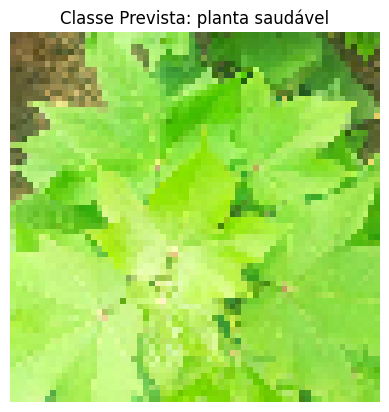

Array de Saída: [[6.0327216e-06 8.6202187e-04 8.8650413e-06 9.9912316e-01]]
Categoria: fresh cotton plant
1/1 [==============================] - 0s 36ms/step


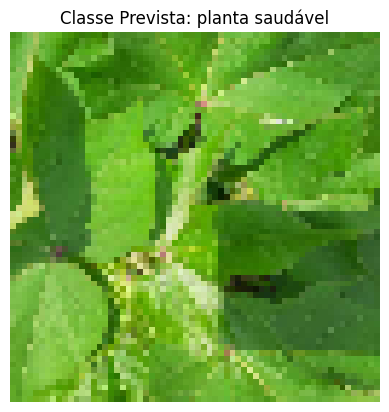

Array de Saída: [[9.5329667e-04 3.3047530e-01 2.8439962e-07 6.6857105e-01]]
Categoria: fresh cotton plant
1/1 [==============================] - 0s 38ms/step


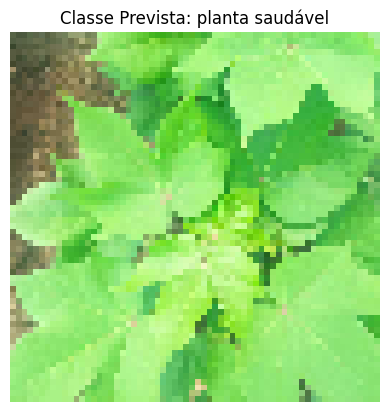

Array de Saída: [[3.1362163e-06 3.3680614e-02 9.7144612e-09 9.6631628e-01]]
Categoria: fresh cotton plant
1/1 [==============================] - 0s 50ms/step


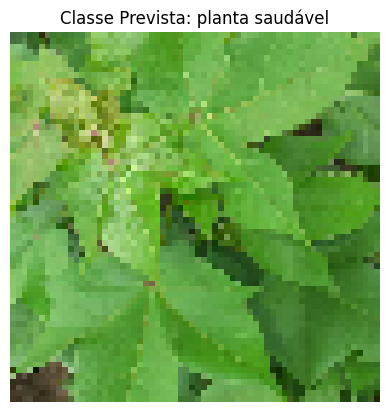

Array de Saída: [[1.4544077e-06 3.8060270e-02 3.3139263e-06 9.6193498e-01]]
Categoria: fresh cotton plant
1/1 [==============================] - 0s 37ms/step


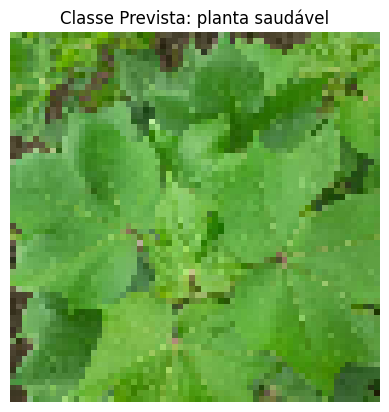

Array de Saída: [[2.7669984e-07 1.6786762e-02 8.9515677e-05 9.8312342e-01]]
Categoria: fresh cotton plant
1/1 [==============================] - 0s 27ms/step


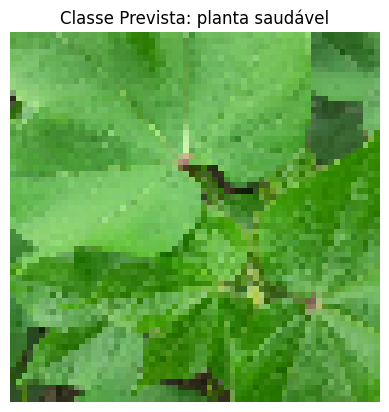

Array de Saída: [[1.5302062e-07 1.8115288e-01 7.6868387e-09 8.1884694e-01]]
Categoria: fresh cotton plant
1/1 [==============================] - 0s 32ms/step


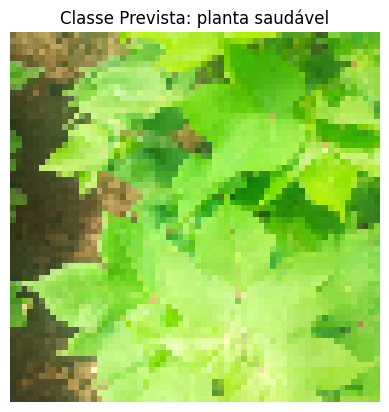

Array de Saída: [[6.0557791e-06 1.5357498e-03 4.4737980e-04 9.9801093e-01]]
Categoria: fresh cotton plant
1/1 [==============================] - 0s 32ms/step


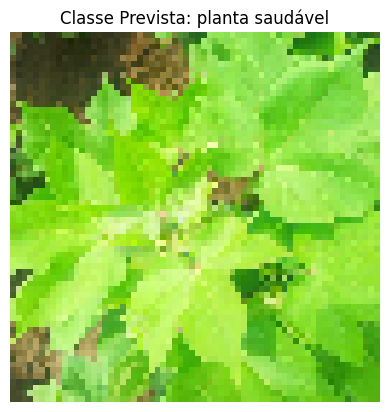

Array de Saída: [[2.0774400e-05 3.2727670e-02 5.6437375e-06 9.6724588e-01]]
Categoria: fresh cotton plant
1/1 [==============================] - 0s 33ms/step


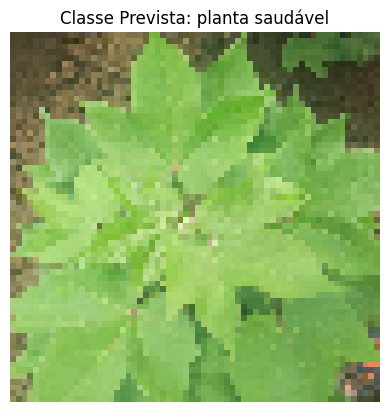

Array de Saída: [[0.00279431 0.11918835 0.00357657 0.87444085]]
Categoria: fresh cotton plant
1/1 [==============================] - 0s 26ms/step


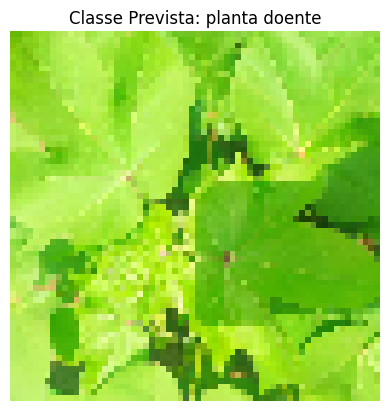

Array de Saída: [[2.5233190e-05 9.9937975e-01 1.4134249e-05 5.8079470e-04]]
Categoria: fresh cotton plant
1/1 [==============================] - 0s 23ms/step


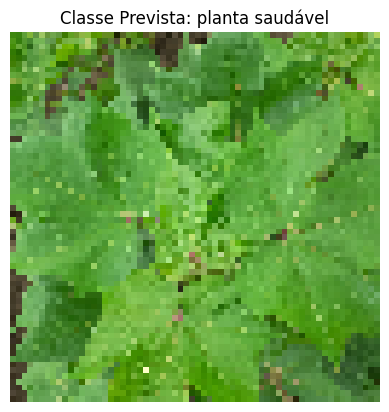

Array de Saída: [[1.5139582e-08 4.2973720e-02 2.2509850e-07 9.5702606e-01]]
Categoria: fresh cotton plant
1/1 [==============================] - 0s 21ms/step


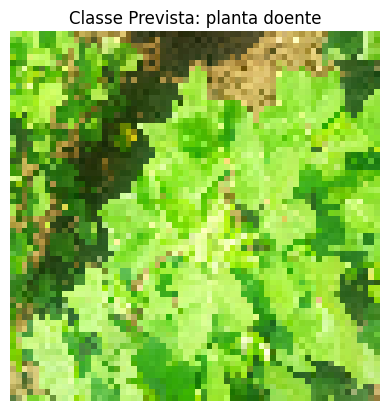

Array de Saída: [[3.2257655e-04 7.6870137e-01 1.0465583e-05 2.3096564e-01]]
Categoria: fresh cotton plant
1/1 [==============================] - 0s 28ms/step


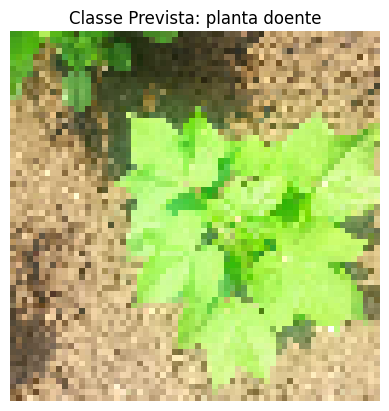

Array de Saída: [[2.0281461e-03 9.7365916e-01 8.2063962e-06 2.4304504e-02]]
Categoria: diseased cotton plant
1/1 [==============================] - 0s 27ms/step


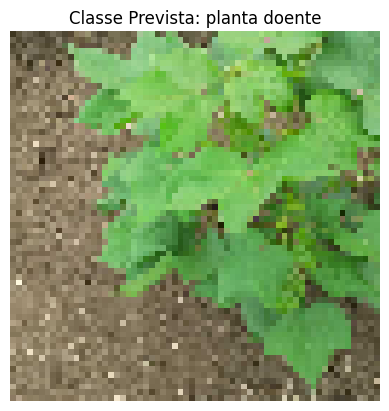

Array de Saída: [[2.3286873e-06 9.9189758e-01 2.3360742e-06 8.0976626e-03]]
Categoria: diseased cotton plant
1/1 [==============================] - 0s 27ms/step


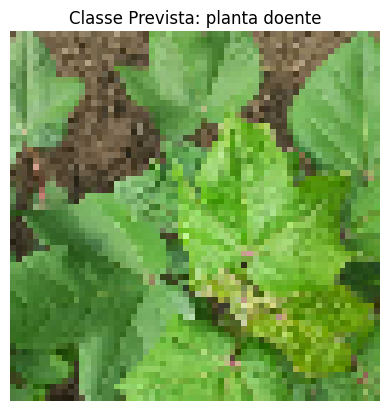

Array de Saída: [[3.6329566e-05 9.2835242e-01 1.3891672e-06 7.1609966e-02]]
Categoria: diseased cotton plant
1/1 [==============================] - 0s 36ms/step


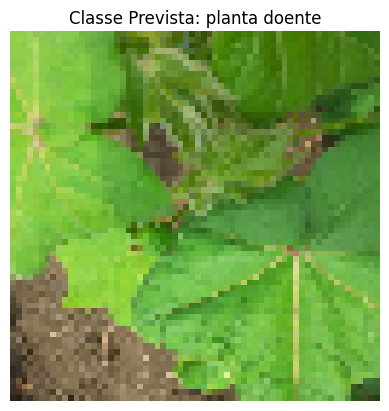

Array de Saída: [[3.3267474e-06 9.9946934e-01 3.6360314e-06 5.2366714e-04]]
Categoria: diseased cotton plant
1/1 [==============================] - 0s 27ms/step


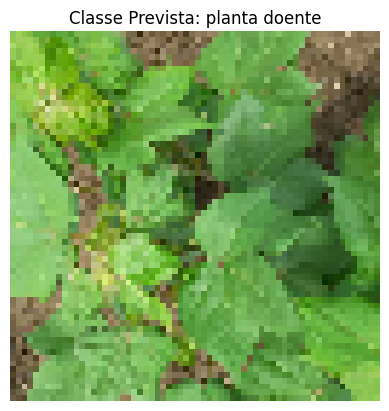

Array de Saída: [[2.1899472e-08 9.9604380e-01 2.9904370e-09 3.9562681e-03]]
Categoria: diseased cotton plant
1/1 [==============================] - 0s 21ms/step


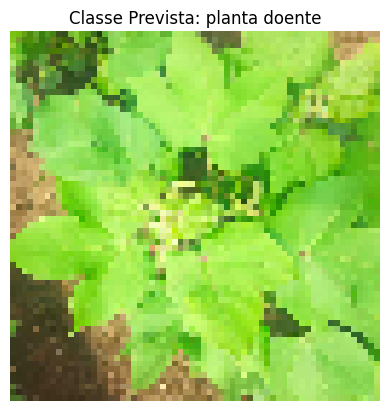

Array de Saída: [[1.7599685e-06 9.9913353e-01 3.8828599e-08 8.6465687e-04]]
Categoria: diseased cotton plant
1/1 [==============================] - 0s 27ms/step


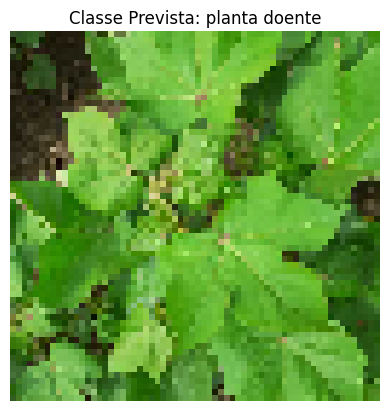

Array de Saída: [[1.9142941e-08 9.9287283e-01 3.4520824e-07 7.1268468e-03]]
Categoria: diseased cotton plant
1/1 [==============================] - 0s 26ms/step


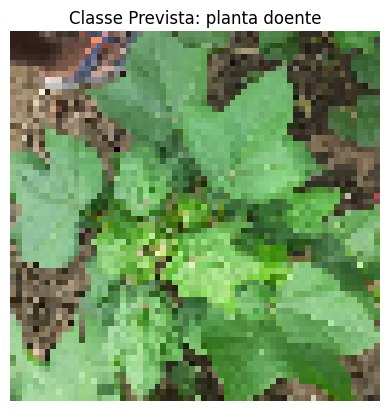

Array de Saída: [[1.8464037e-10 9.9999797e-01 6.5251459e-12 2.0675570e-06]]
Categoria: diseased cotton plant
1/1 [==============================] - 0s 18ms/step


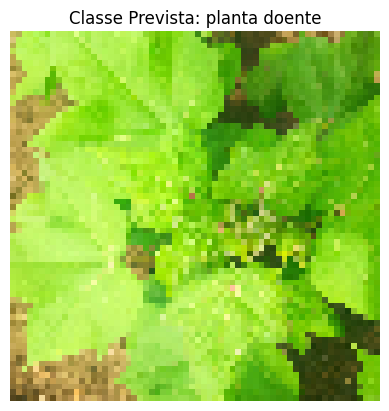

Array de Saída: [[9.8158734e-09 9.9992871e-01 2.9348235e-09 7.1288989e-05]]
Categoria: diseased cotton plant
1/1 [==============================] - 0s 18ms/step


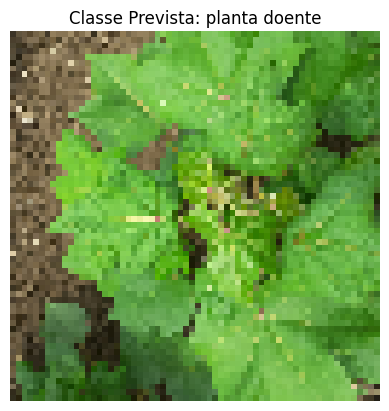

Array de Saída: [[5.1877652e-10 9.9998391e-01 2.5327806e-13 1.6076707e-05]]
Categoria: diseased cotton plant
1/1 [==============================] - 0s 22ms/step


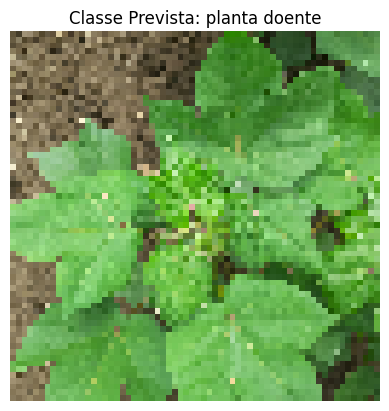

Array de Saída: [[6.5731065e-08 9.9041861e-01 1.2808063e-09 9.5813191e-03]]
Categoria: diseased cotton plant
1/1 [==============================] - 0s 25ms/step


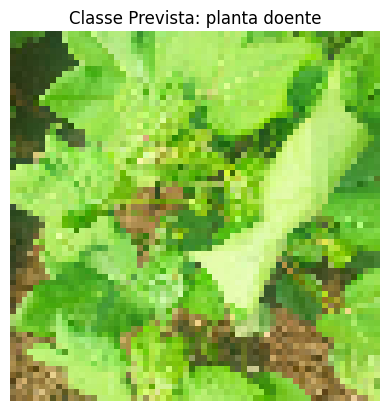

Array de Saída: [[6.8568079e-06 9.9944776e-01 1.0739735e-09 5.4527336e-04]]
Categoria: diseased cotton plant
1/1 [==============================] - 0s 29ms/step


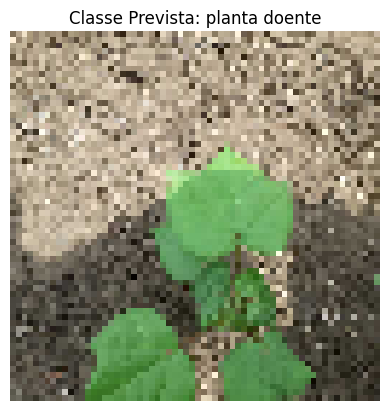

Array de Saída: [[6.5082006e-02 9.3380392e-01 1.1135512e-03 5.7341941e-07]]
Categoria: diseased cotton plant
1/1 [==============================] - 0s 34ms/step


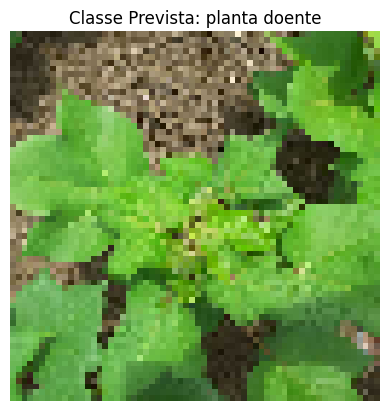

Array de Saída: [[1.59802855e-08 9.99986649e-01 1.16230998e-08 1.33424255e-05]]
Categoria: diseased cotton plant
1/1 [==============================] - 0s 25ms/step


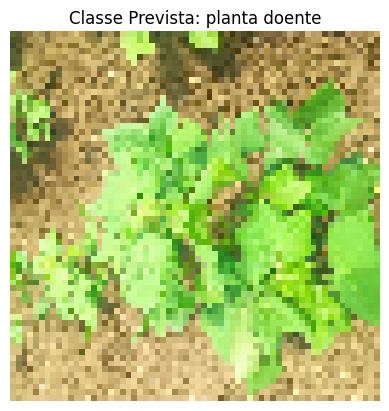

Array de Saída: [[2.2173641e-07 9.9949265e-01 1.9850370e-09 5.0706021e-04]]
Categoria: diseased cotton plant
1/1 [==============================] - 0s 28ms/step


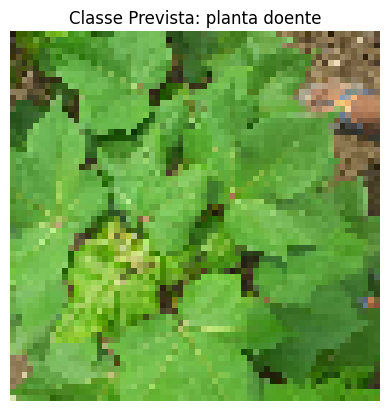

Array de Saída: [[1.6167170e-09 9.9786431e-01 3.2780262e-10 2.1356845e-03]]
Categoria: diseased cotton plant
1/1 [==============================] - 0s 25ms/step


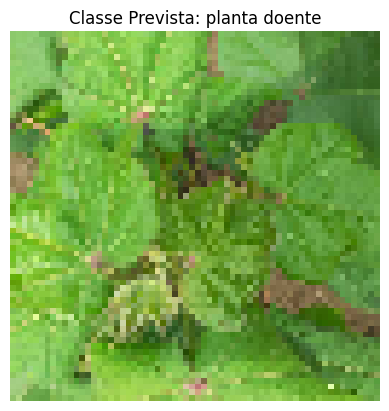

Array de Saída: [[2.4759602e-06 9.9697840e-01 2.9845006e-07 3.0188840e-03]]
Categoria: diseased cotton plant
1/1 [==============================] - 0s 26ms/step


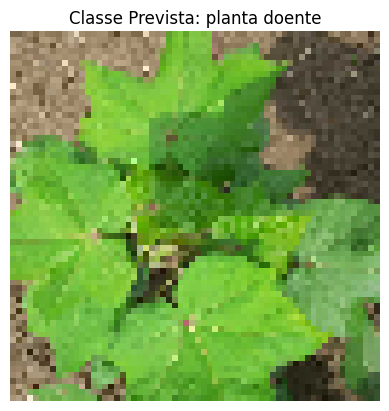

Array de Saída: [[1.6171990e-07 9.9997866e-01 5.7432912e-09 2.1174099e-05]]
Categoria: diseased cotton plant
1/1 [==============================] - 0s 19ms/step


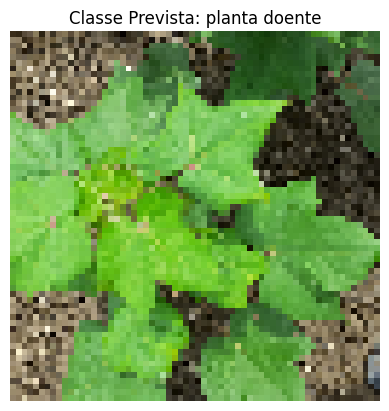

Array de Saída: [[1.2088982e-07 9.9988222e-01 2.7576959e-07 1.1740462e-04]]
Categoria: diseased cotton plant
1/1 [==============================] - 0s 36ms/step


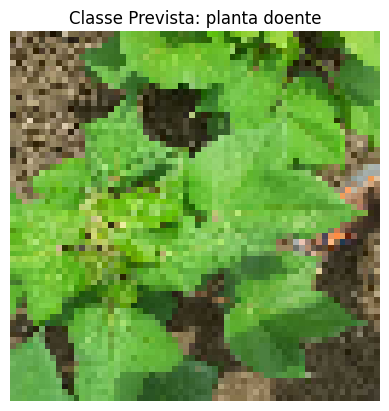

Array de Saída: [[9.3256602e-08 9.9996102e-01 5.1641756e-08 3.8813221e-05]]
Categoria: diseased cotton plant
1/1 [==============================] - 0s 28ms/step


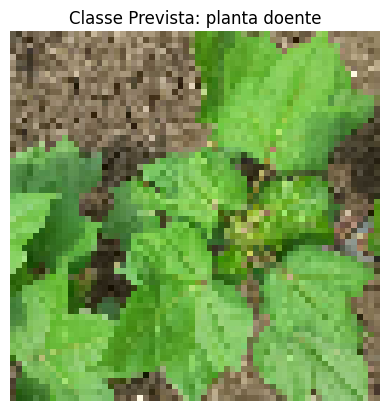

Array de Saída: [[3.6721401e-09 9.9985492e-01 1.0657110e-08 1.4504192e-04]]
Categoria: diseased cotton plant
1/1 [==============================] - 0s 20ms/step


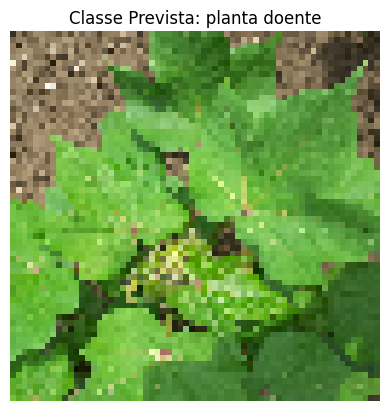

Array de Saída: [[8.8433844e-10 9.9993002e-01 2.3033097e-12 6.9931484e-05]]
Categoria: diseased cotton plant
1/1 [==============================] - 0s 34ms/step


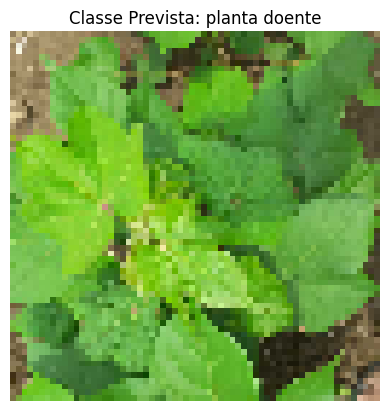

Array de Saída: [[7.969297e-08 9.992132e-01 5.792716e-09 7.866153e-04]]
Categoria: diseased cotton plant
1/1 [==============================] - 0s 30ms/step


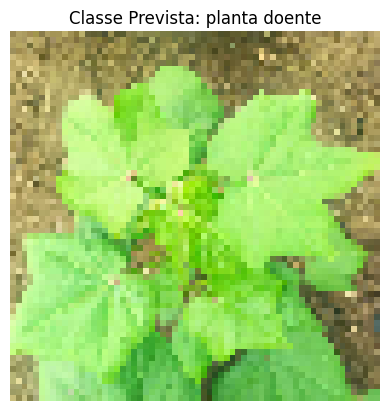

Array de Saída: [[2.0778337e-09 9.9999762e-01 4.2408083e-10 2.3645921e-06]]
Categoria: diseased cotton plant
1/1 [==============================] - 0s 26ms/step


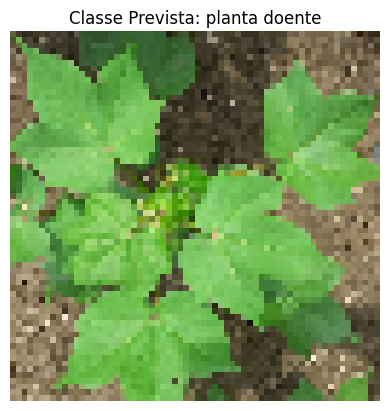

Array de Saída: [[1.1064009e-06 9.9985421e-01 1.0427590e-06 1.4361352e-04]]
Categoria: diseased cotton plant
1/1 [==============================] - 0s 29ms/step


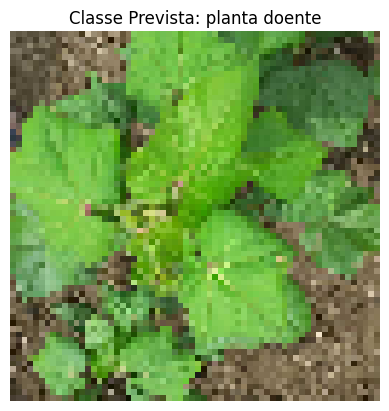

Array de Saída: [[6.2712004e-08 9.9999046e-01 9.6165131e-10 9.4444922e-06]]
Categoria: diseased cotton plant
1/1 [==============================] - 0s 25ms/step


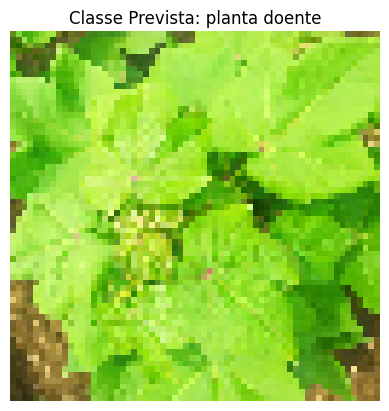

Array de Saída: [[3.0078862e-10 9.9969923e-01 1.7117047e-07 3.0065470e-04]]
Categoria: diseased cotton plant
1/1 [==============================] - 0s 25ms/step


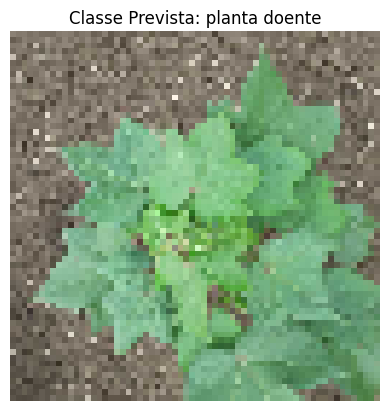

Array de Saída: [[4.8695465e-06 9.9827707e-01 4.0895815e-05 1.6771497e-03]]
Categoria: diseased cotton plant
1/1 [==============================] - 0s 29ms/step


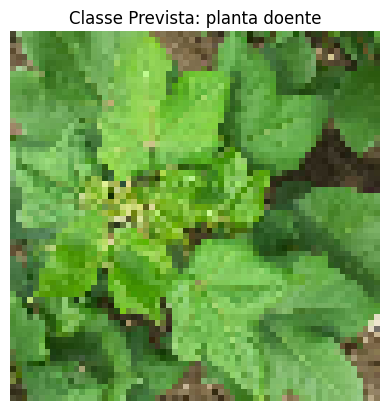

Array de Saída: [[1.1168736e-09 9.9905390e-01 2.5220804e-12 9.4615127e-04]]


In [22]:
import os

# Diretório da pasta de teste
test_folder = 'Cotton Disease/test/'

# Classe nomes
class_names = ["diseased_leaf", "diseased_plant", "fresh_leaf", "fresh_plant"]

# Iterar sobre todas as subpastas na pasta de teste
for subfolder in os.listdir(test_folder):
    subfolder_path = os.path.join(test_folder, subfolder)

    # Verificar se é uma pasta
    if os.path.isdir(subfolder_path):
        # Lista de todos os arquivos na subpasta
        image_files = [f for f in os.listdir(subfolder_path) if os.path.isfile(os.path.join(subfolder_path, f))]

        # Iterar sobre todas as imagens na subpasta
        for image_file in image_files:
            # Caminho completo da imagem
            image_path = os.path.join(subfolder_path, image_file)

            # Exibir o nome da subpasta (categoria)
            print("Categoria:", subfolder)

            # Fazer previsão e visualizar
            visualize_image_and_prediction(cnn, image_path, class_names)
